In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,...,vi_time,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,rpp_minus_alpha
0,eth-2-ms-10,ethereum-wp-2,0,10,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),290.320362,161164,7,592668,...,334.598943,17.599302,25.507804,2399,2399,0.847912,0.185355,2,0.840759,3.535548e-02
1,eth-3-ms-9,ethereum-wp-3,0,9,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),212.098544,129135,8,455184,...,205.358453,9.304508,17.057399,1243,1243,0.146814,0.144918,2,0.458235,9.491839e-02
2,par-3-ms-13,parallel-3,0,13,"sm.SelfishMining(Parallel(k=3), alpha=0.125, g...",Parallel(k=3),442.274236,156965,10,852290,...,440.339845,17.225086,27.738966,662,662,0.028932,0.171947,2,0.237301,2.194698e-02
3,btc-ms-22,bitcoin,0,22,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),641.436093,153461,4,814984,...,468.600866,19.899821,39.249322,539,539,0.018208,0.200000,2,0.215305,1.837697e-12
4,eth-3-ms-9,ethereum-wp-3,0,9,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),212.098544,129135,8,455184,...,247.892945,17.737150,24.658555,1243,1243,0.144547,0.235651,2,0.460554,1.356509e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,byz-2-ms-10,ethereum-bz-2,0,10,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),300.682133,160541,6,590449,...,466.423266,62.658574,67.954835,1105,1105,0.099283,0.628889,2,0.387684,1.788891e-01
212,byz-3-ms-9,ethereum-bz-3,0,9,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),217.297386,129075,8,455098,...,164.273667,4.955840,12.465660,1335,1335,0.163139,0.051410,2,0.485045,1.409699e-03
213,eth-2-ms-10,ethereum-wp-2,0,10,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),290.320362,161164,7,592668,...,429.076207,41.443420,48.233673,1174,1174,0.124131,0.415491,2,0.412916,1.154906e-01
214,eth-3-ms-9,ethereum-wp-3,0,9,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),212.098544,129135,8,455184,...,203.234153,9.304508,17.057399,1243,1243,0.142527,0.093386,2,0.428604,4.338572e-02


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0].drop(columns=["model_hum", "protocol_hum"])

,key,protocol,maximum_height,maximum_size,time,n_states,n_actions,n_transitions,alpha,gamma,...,vi_time,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,rpp_minus_alpha


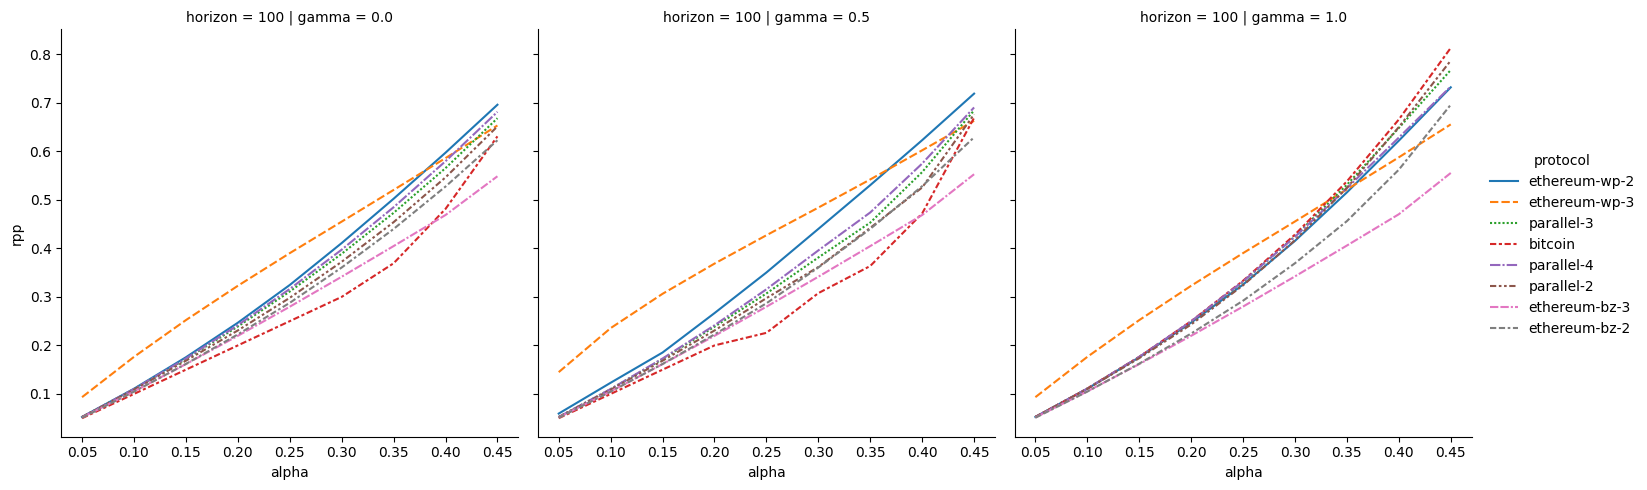

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

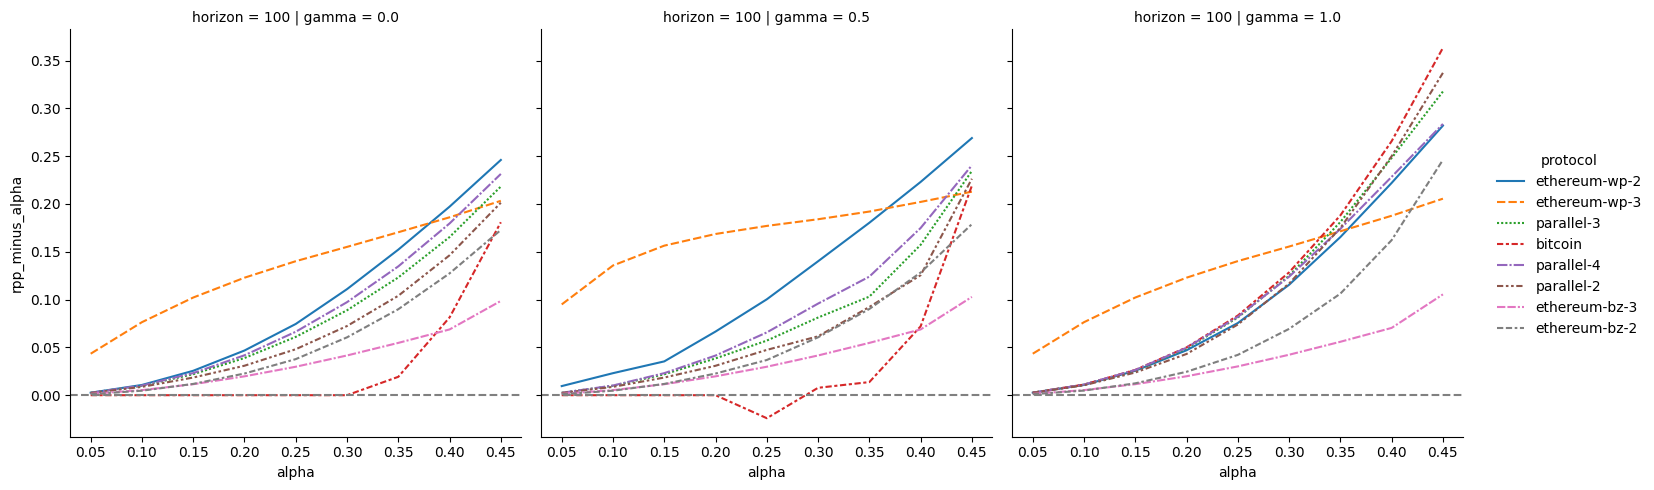

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
).refline(y=0)

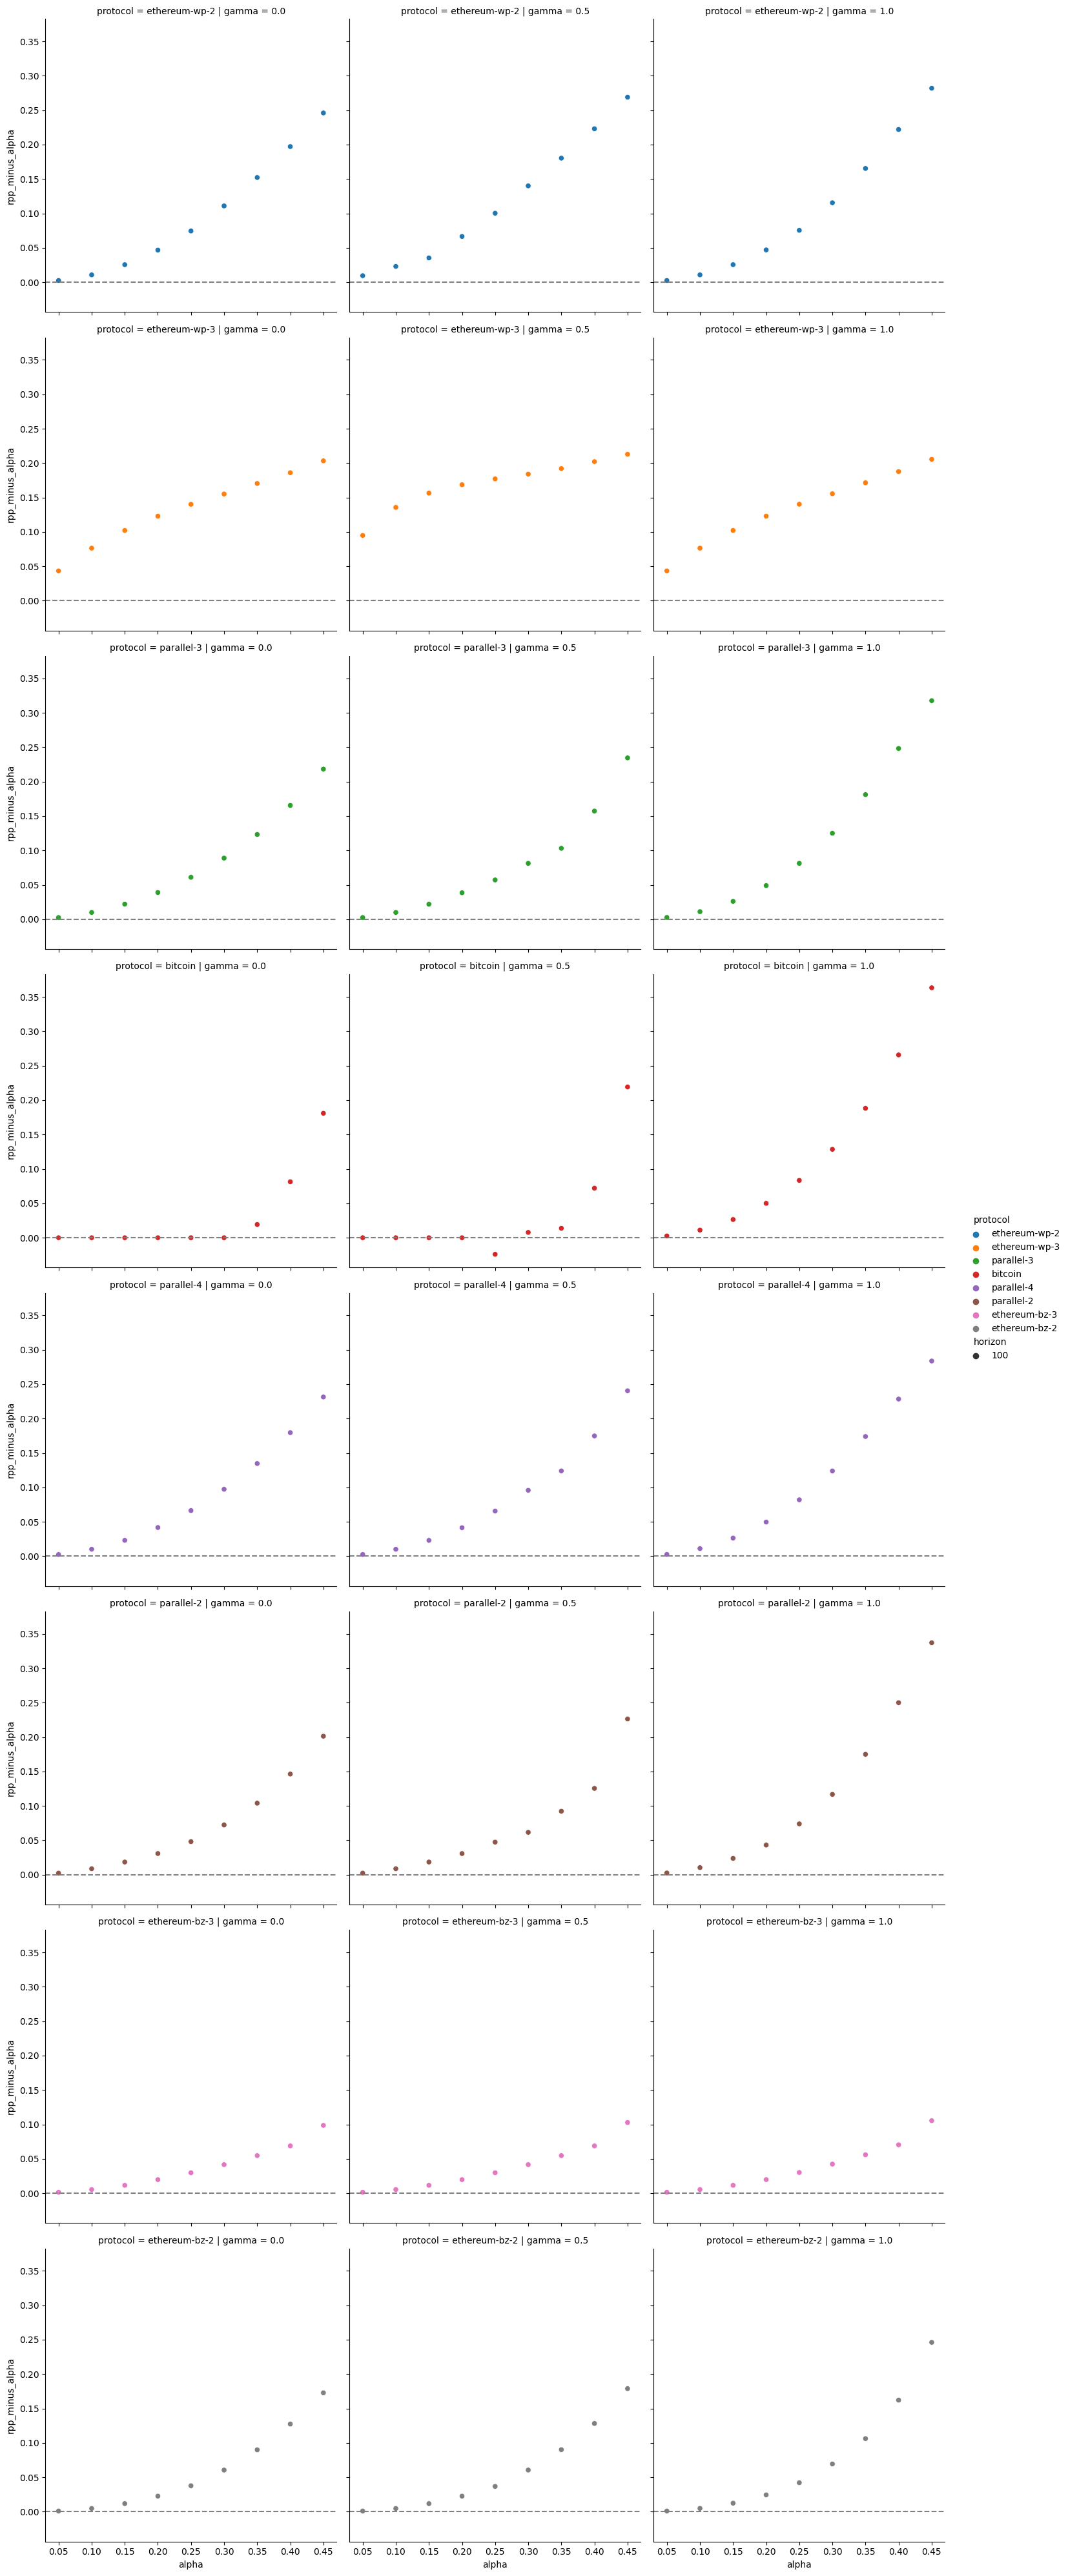

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="protocol",
    hue="protocol",
    style="horizon",
).refline(y=0)

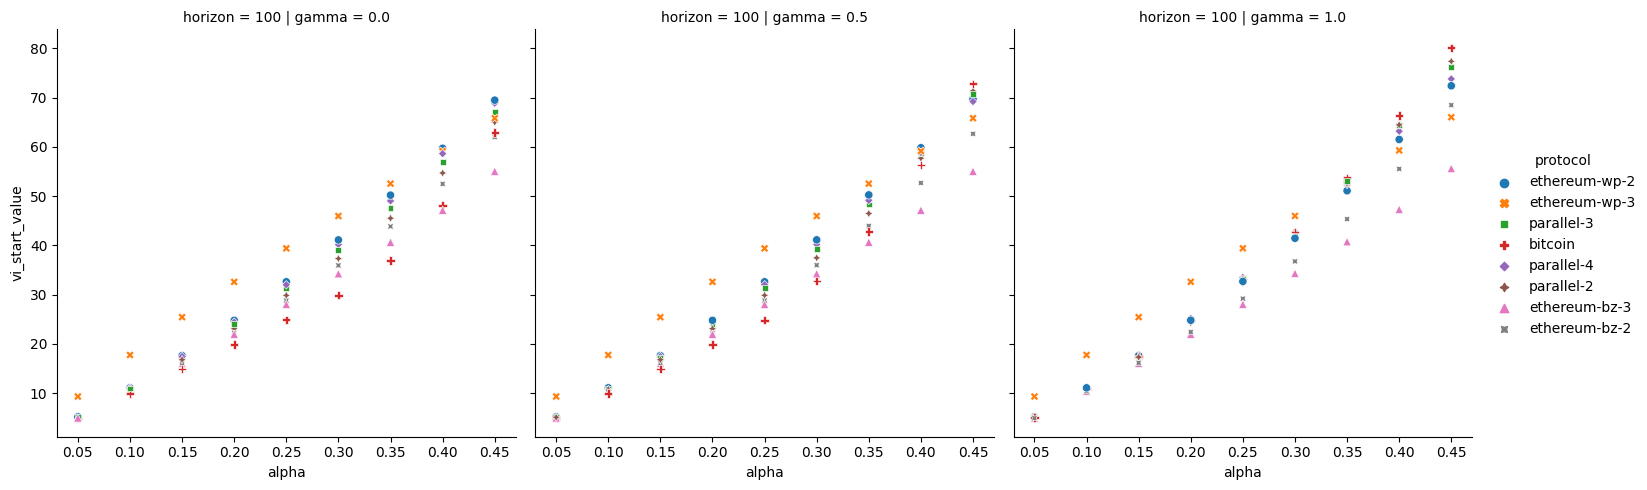

In [7]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="vi_start_value",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

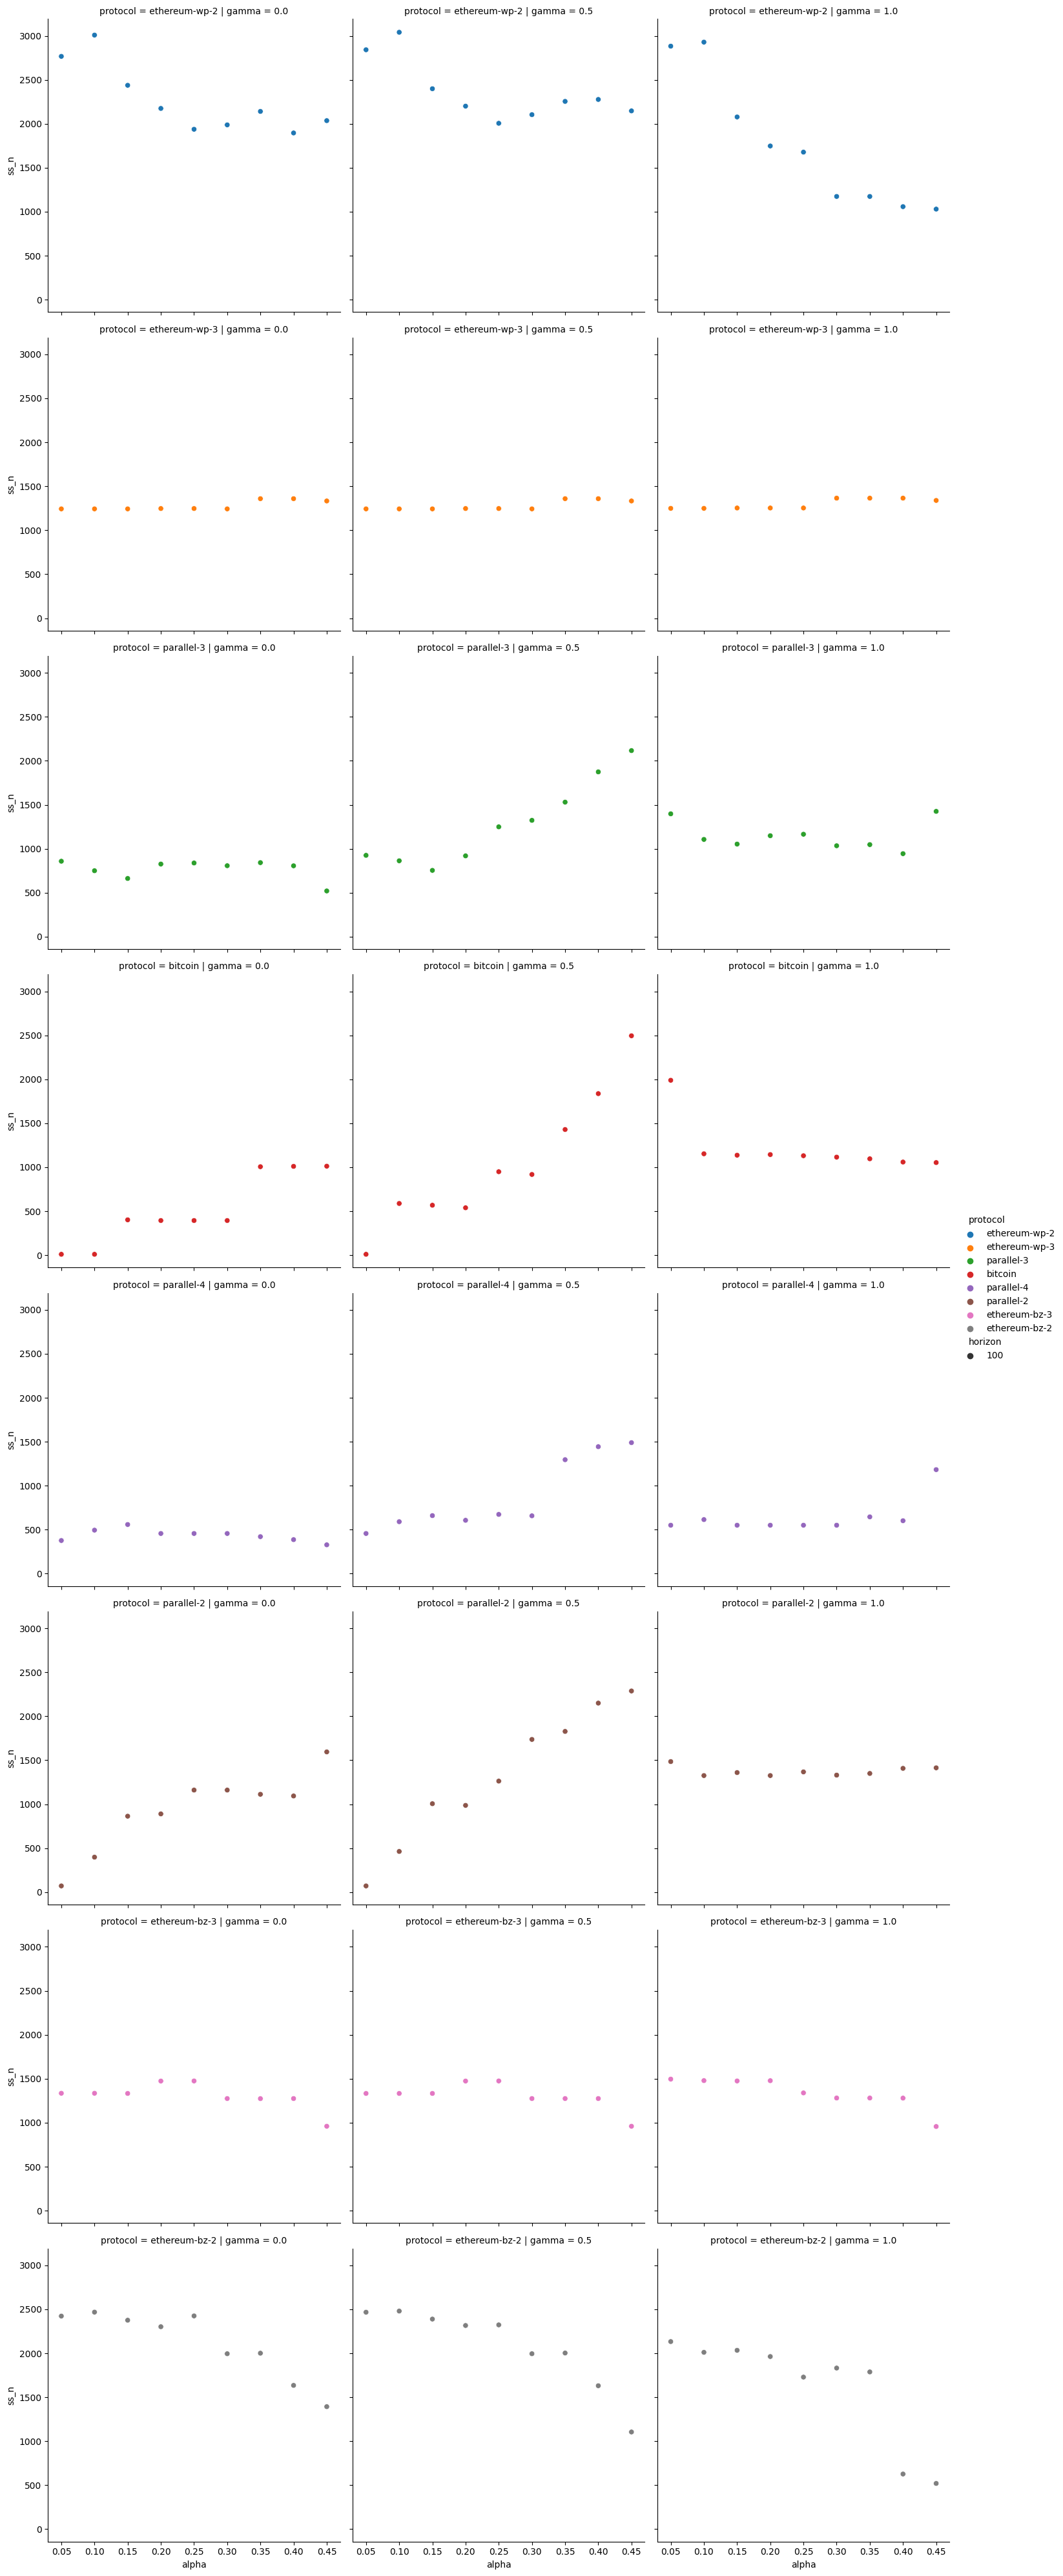

In [8]:
# Compare policy size
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="protocol",
    hue="protocol",
    style="horizon",
)